# Spatial transcriptomics unveils the in situ cellular and molecular hallmarks of the lung in fatal COVID-19

# Analysis of the spatial arrangement of cell types

**Author:** Carlos A. Garcia-Prieto

* This notebook explains how to determine and compare spatial arrangement of distinct cell types among biological conditions applied to Visium ST data using [GraphCompass.](https://github.com/theislab/graphcompass/)
* We followed [portrait method](https://github.com/theislab/graphcompass/blob/main/notebooks/portrait/portrait_visium.ipynb) and [filtration curves](https://github.com/theislab/graphcompass/blob/main/notebooks/filtration_curves/filtration_curves_visium.ipynb) tutorials applied to Visium ST data. 

## Import modules

In [1]:
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2
import scanpy as sc
import graphcompass as gc
import cell2location
from cell2location.utils import select_slide
import pandas as pd
pd.set_option('display.max_columns', 100)
import os
import numpy as np
import seaborn as sns

# Read integrated VISIUM ST data with estimated cell type abundances and TF enrichment results

In [2]:
#Set result folders
results_folder = "/mnt/beegfs/cgarcia/Spatial/COVID19/cell2location/HLCA_publication/HLCA/"
ref_run_name = f'{results_folder}reference_signatures_finest'
run_name = f'{results_folder}cell2location_map_finest'
bivariate_folder = f'{results_folder}/liana/bivariate/'

#Create directory for GraphCompass results
directory = f'{results_folder}/GraphCompass'
# Check if the directory exists
if not os.path.exists(directory):
    # If it doesn't exist, create it
    os.makedirs(directory)
    
gc_folder = "/mnt/beegfs/cgarcia/Spatial/COVID19/cell2location/HLCA_publication/HLCA/GraphCompass/"

In [3]:
#Read anndata with TF enrichment results:
adata_file = f"{bivariate_folder}anndataWith005MinimumExpr/ad_vis_post_distrib_finest_discrete_region_NMF_lineage_decoupler_mlm_Paper.h5ad"
adata_full = sc.read_h5ad(adata_file)

# Compute distances between cell-type specific subgraphs using portrait method to compare conditions

In [4]:
#Define library_key and cluster_key for computing spatial graphs 
library_key="sample"
cluster_key="Max_Abundance_Cell" #Set spot-wise most abundant cell type

In [5]:
#Copy annData object for portrait method
adata_full_gc = adata_full.copy()

In [6]:
#Compute pairwise similarities between cell type specific graphs across samples
#To avoid FutureWarning: nano +1113 /mnt/beegfs/cgarcia/.conda/envs/liana_env/lib/python3.9/site-packages/anndata/_core/anndata.py
#Replace "if not is_categorical_dtype(df_full[k])" by "if not isinstance(df_full[k].dtype, pd.CategoricalDtype)"

gc.tl.distance.compare_conditions(
    adata=adata_full_gc,
    library_key=library_key,
    cluster_key=cluster_key,
    method="portrait",
    compute_spatial_graphs = True,
    kwargs_spatial_neighbors={
        'coord_type': 'grid',
        'n_neighs': 6,
    },
)

Computing spatial graphs...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2249.02/s]


Computing graph similarities...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [42:00<00:00, 60.00s/it]


Done!


In [7]:
# Save anndata object with results
adata_full_gc_file = f"{gc_folder}/ad_vis_post_distrib_finest_discrete_region_NMF_lineage_decoupler_mlm_portrait_Paper.h5ad"
adata_full_gc.write(adata_full_gc_file)

# Plot cell-type-specific subgraphs across condition pairs with pairwise similarity score variances

In [8]:
#Define necessary parameters
condition_key="condition_subtype" #Key in adata.obs where conditions are stored
control_group="Control" #Set reference group

<div class="alert alert-info">
<b>Paper Figure!</b>
Figure 2D
</div>

42it [00:07,  5.37it/s]


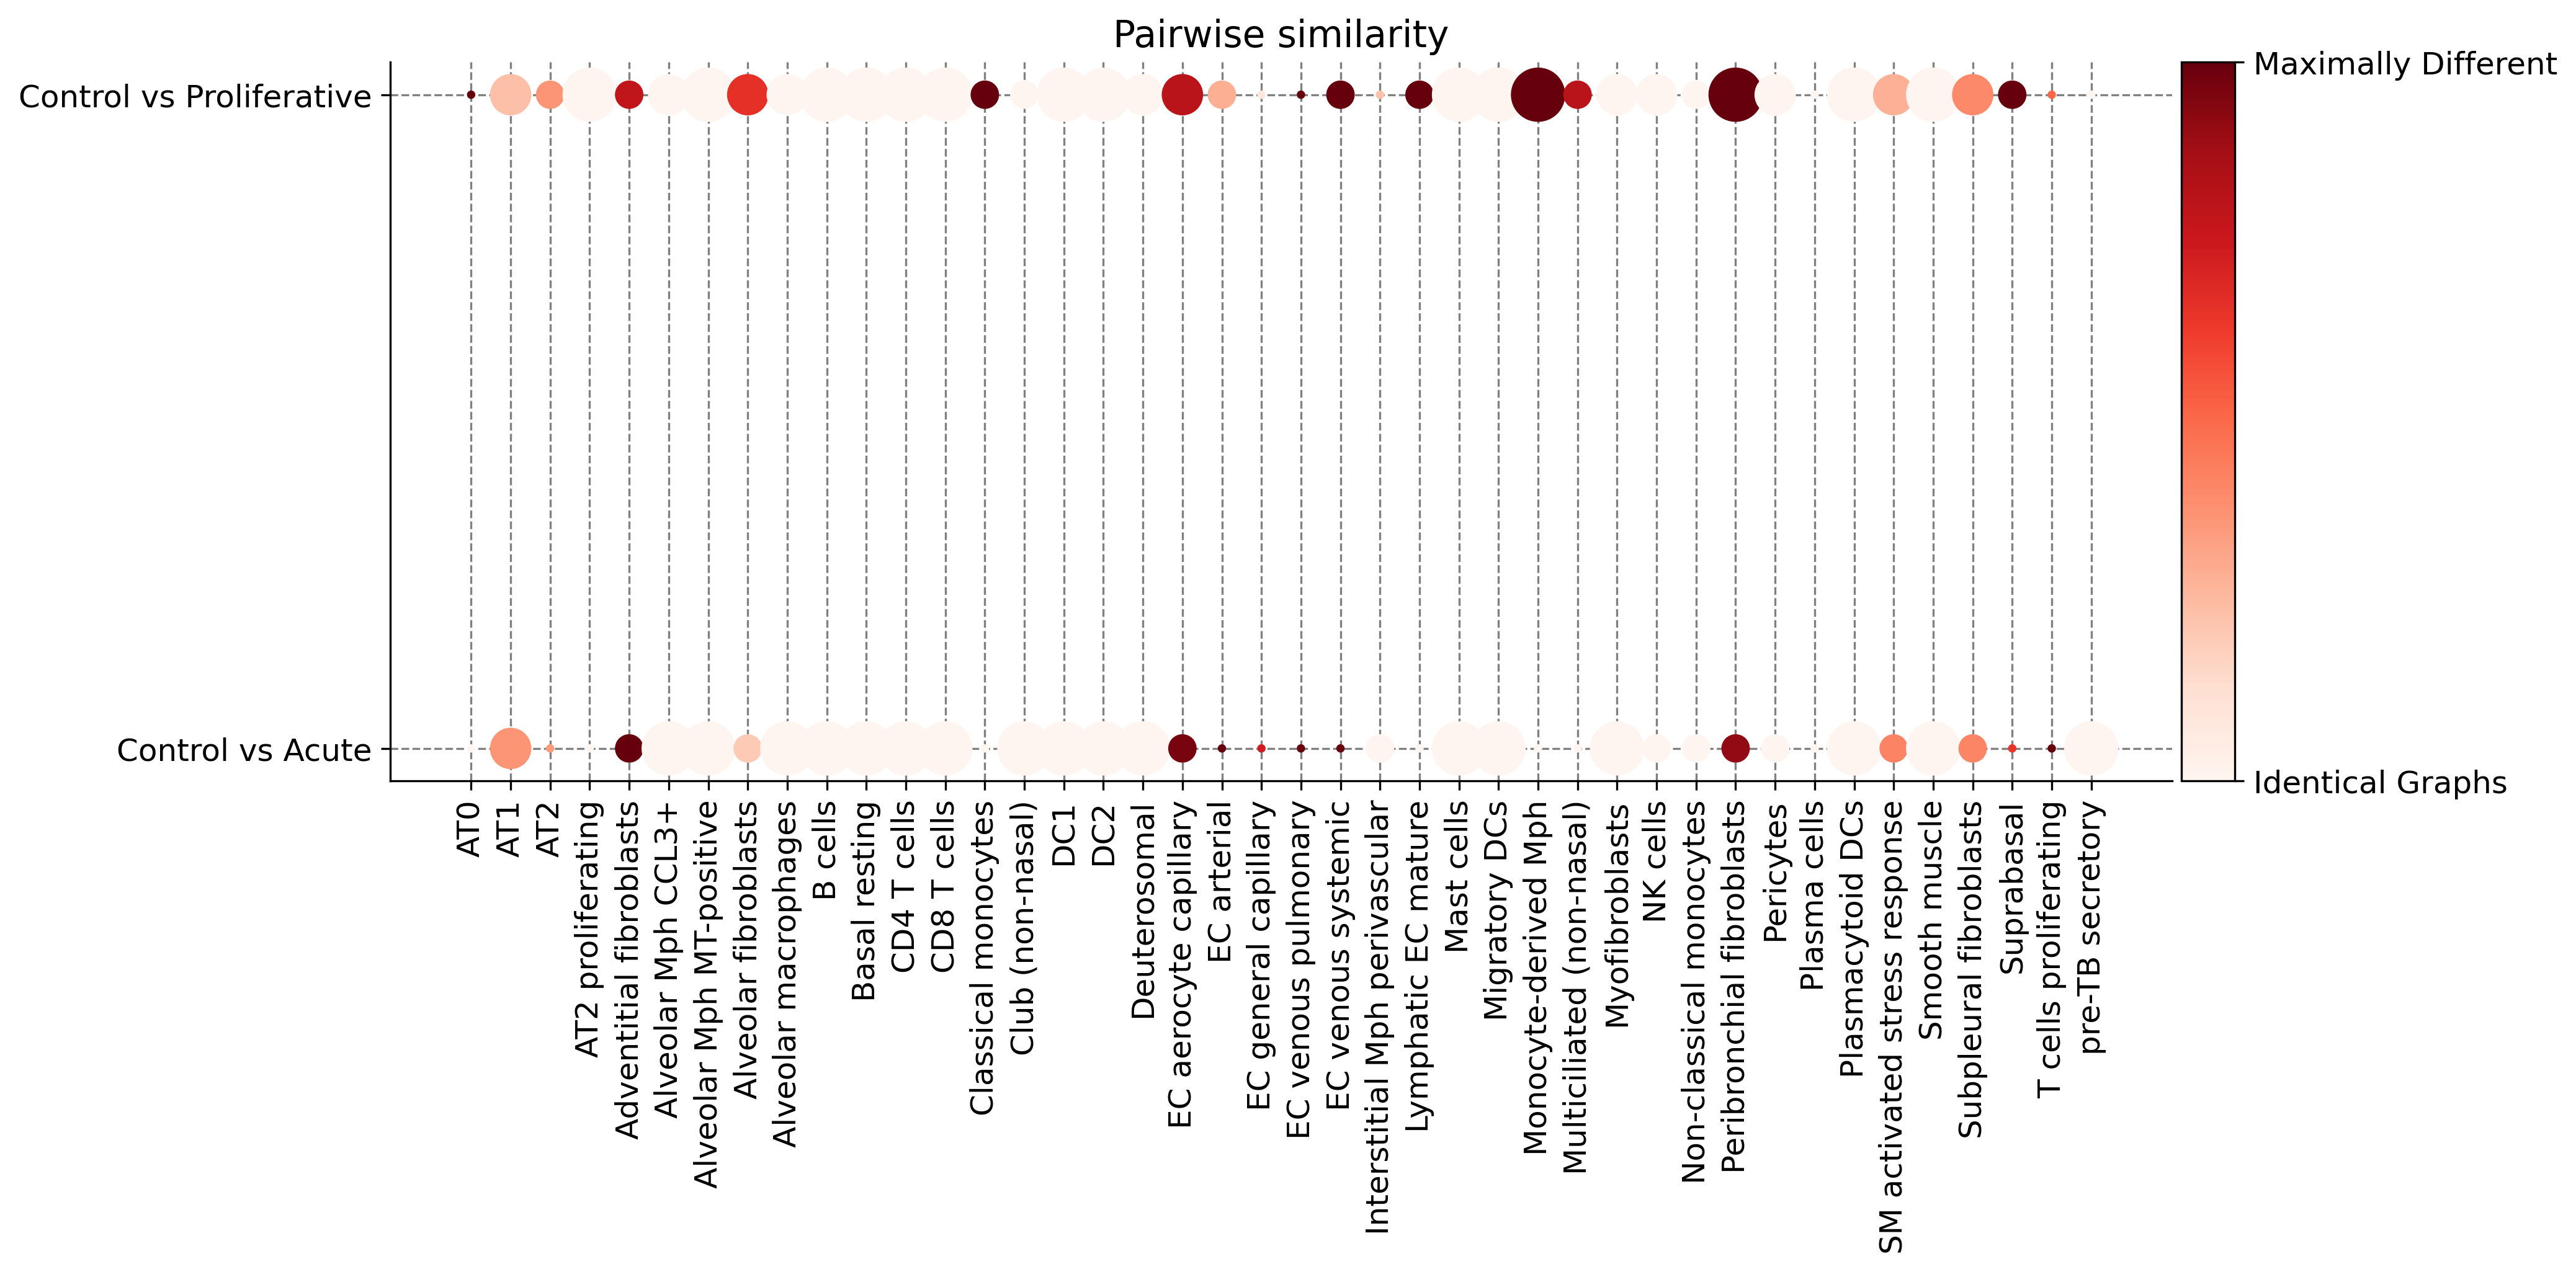

In [9]:
#Plot pairwise similarity score variances

gc.pl.distance.compare_conditions(
    adata=adata_full_gc,
    library_key=library_key,
    condition_key=condition_key,
    control_group=control_group,
    add_ncells_and_density_plots=False,
    palette="Reds",
    dpi=300,
    figsize=(14,7),
    save=f"{gc_folder}portrait_Paper.pdf"
)

# Compare entire sample graphs using filtrations curves

In [10]:
#Sample information
library_key = 'sample'
# Cell type information
cell_type_key = 'Max_Abundance_Cell' #Set spot-wise most abundnat cell type
# Condition information
condition_key = 'condition_subtype'

In [11]:
# Set arguments for Visium ST data (wihthin Visium grid each spot has six direct neighbors)
kwargs_spatial_neighbors = {
    "coord_type": "grid",
    "n_neighs": 6,
}

In [12]:
#reate graph from spatial coordinates, determine threshold values and create filtration curves comparing conditions
gc.tl._filtration_curves.compare_conditions(
    adata_full,
    library_key=library_key,
    cluster_key=cell_type_key,
    condition_key=condition_key,
    attribute="weight",
    compute_spatial_graphs=True,
    kwargs_spatial_neighbors=kwargs_spatial_neighbors,
    copy=False,
)

Computing spatial graph...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2521.86/s]


Computing edge weights...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:06<00:00,  3.74it/s]


Computing edge weight threshold values...
Creating filtration curves...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 122.86it/s]

Done!


## Plot filtration curves

<div class="alert alert-info">
<b>Paper Figure!</b>
Figure 2E
</div>

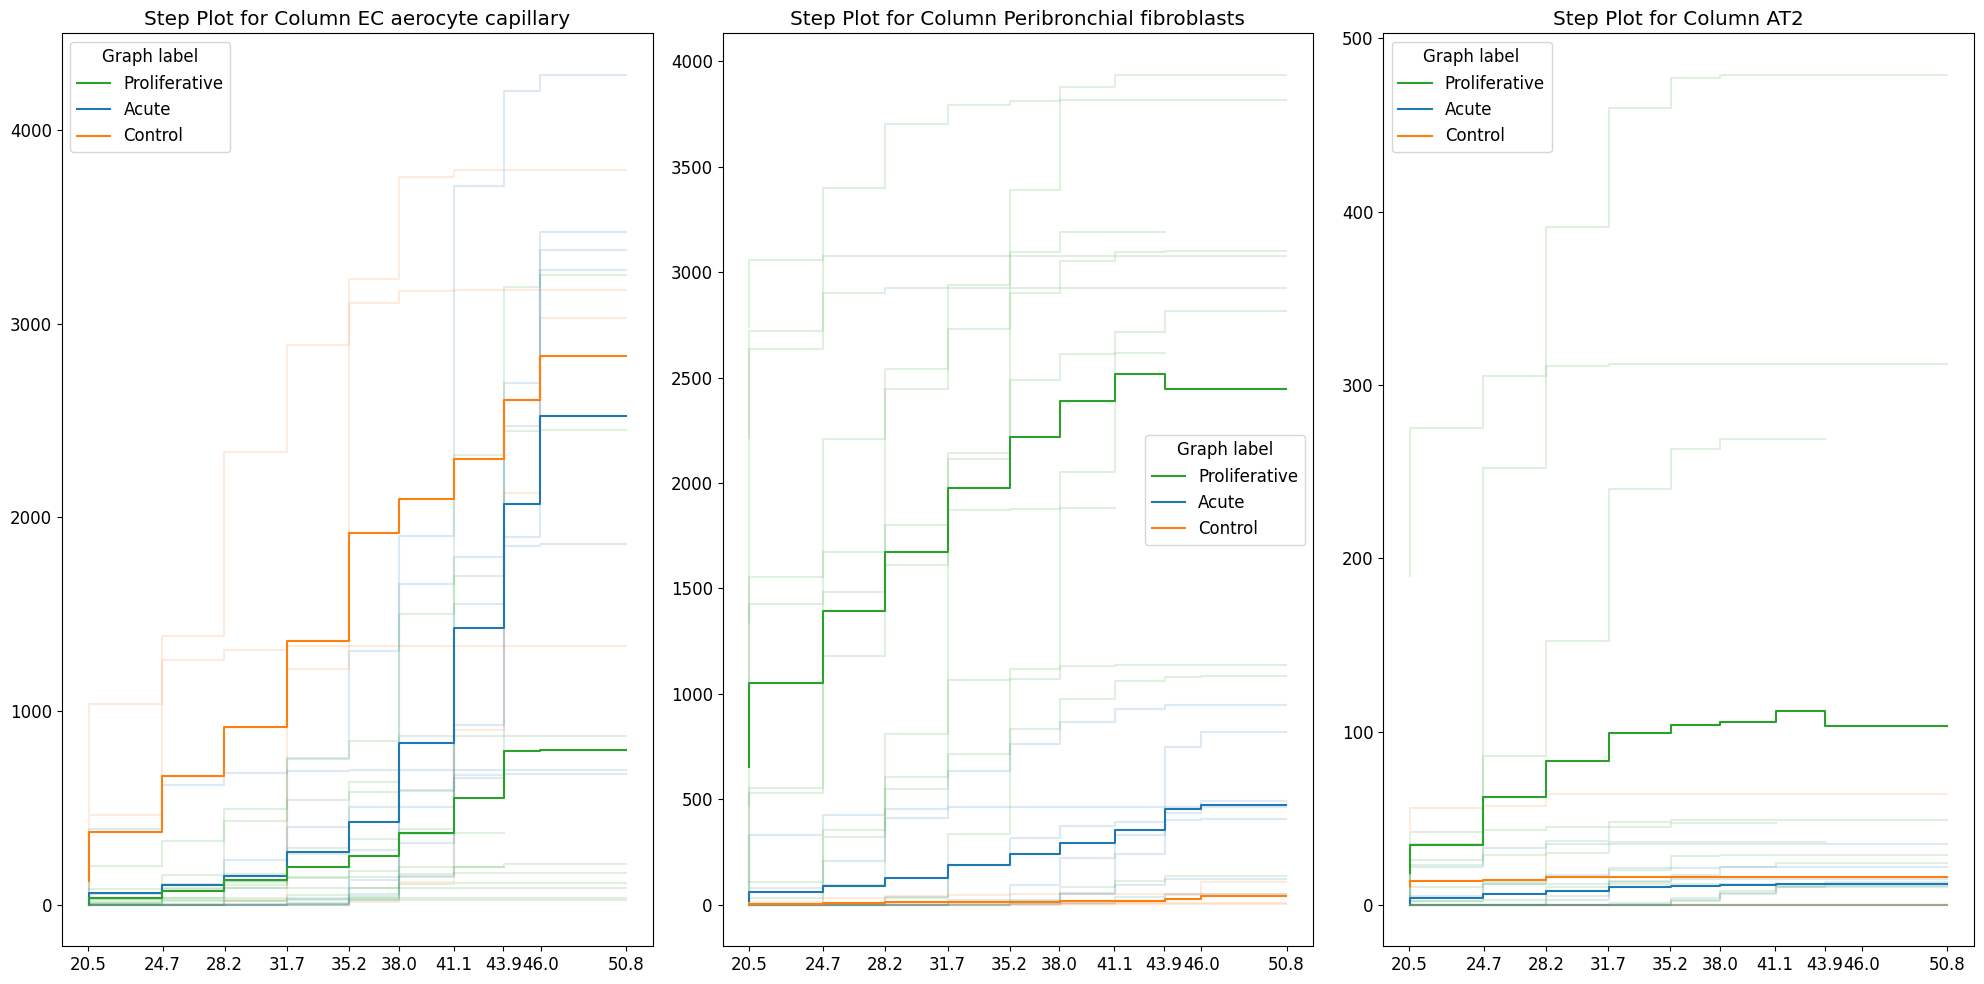

In [13]:
#Plot filtration curves for selected cell types
gc.pl._filtration_curves.compare_conditions(
        adata_full,
        node_labels=["EC aerocyte capillary", "Peribronchial fibroblasts", "AT2"],
        palette = "tab10",
        dpi=300,
        figsize=(20,10),
        save=f"{gc_folder}Filtration_Paper.pdf")

### Modules and their versions used for this analysis


Useful for debugging and reporting issues.

In [14]:
cell2location.utils.list_imported_modules()

sys 3.9.18 (main, Sep 11 2023, 13:41:44) 
[GCC 11.2.0]
re 2.2.1
ipykernel._version 6.25.2
json 2.0.9
jupyter_client._version 8.3.1
platform 1.0.8
_ctypes 1.1.0
ctypes 1.1.0
zmq.sugar.version 25.1.1
zmq.sugar 25.1.1
zmq 25.1.1
logging 0.5.1.2
traitlets._version 5.10.0
traitlets 5.10.0
jupyter_core.version 5.3.1
jupyter_core 5.3.1
tornado 6.3.3
zlib 1.0
_curses b'2.2'
socketserver 0.4
argparse 1.1
dateutil._version 2.8.2
dateutil 2.8.2
six 1.16.0
_decimal 1.70
decimal 1.70
platformdirs.version 3.10.0
platformdirs 3.10.0
_csv 1.0
csv 1.0
jupyter_client 8.3.1
ipykernel 6.25.2
IPython.core.release 8.15.0
executing.version 1.2.0
executing 1.2.0
pure_eval.version 0.2.2
pure_eval 0.2.2
stack_data.version 0.6.2
stack_data 0.6.2
pygments 2.16.1
ptyprocess 0.7.0
pexpect 4.8.0
IPython.core.crashhandler 8.15.0
pickleshare 0.7.5
backcall 0.2.0
decorator 5.1.1
_sqlite3 2.6.0
sqlite3.dbapi2 2.6.0
sqlite3 2.6.0
exceptiongroup._version 1.1.3
exceptiongroup 1.1.3
wcwidth 0.2.6
prompt_toolkit 3.0.39
parso